# COGS 108 - Data Checkpoint

## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [X] YES - make available
- [ ] NO - keep private

# Names

- Colby Hillers
- Calvin Cheung
- Jorge Mendoza
- Javon Maxie
- Hoang Nguyen

# Overview

**TODO: Fill this out**

Detailed overview of our project and results

<a id='research_question'></a>
# Research Question

In the NBA, over the regular season, do international players have a higher Individual Efficiency Metric (EFF), a metric that takes into account points, rebounds, assists, steals, blocks, missed field goals and free throws, turnovers, and games played, than players born in the United States?

# Background & Prior Work

 The dominance of international talent such as Luka Doncic, Nikola Jokic, and Giannis Antetokounmpo in the National Basketball Association (NBA) is impossible to ignore. These players, however, were only a few of the standout international players. This past season, six international players were indoctrinated to the All-NBA Team, an honor granted to the overall best players in the league for that season [1]. The presence of international talent in the NBA has also seen a steady incline as, in the league's first season in 1946-47, there were a mere five international players compared to a record 113 international players at the start of the 2016-17 season [1]. After seeing these statistics, it becomes clear that international players are undoubtedly leaving their mark and making history in the league. As fans of the NBA, we became curious and set out to compare the performances of international and national talent in the league.
 
 In an article from HoopsHype, a branch of USA Today Sports, Frank Urbina constructs a hypothetical roster of players for a USA vs. Rest of the World game with the USA roster consisting of the best USA NBA players and the Rest of the World roster consisting of the best international NBA players. Urbina believes the international team have the advantage in playmaking and rebounding while US players have the edge when it comes to shooting and athleticism [2]. Urbina stresses how close he thinks the matchup would be, but overall believes that team USA would have the slight edge [2]. The matchup Urbina has constructed is only hypothetical and inconclusive in which he makes use of speculation to compare how players would match up against each other. In our study, we plan to attach empirical data to these players to see how they truly compare against each other.
  
  On the subject of calculating a player's performance, an article from Watts Basketball discussing how professionals in the league calculate player efficiency will be of use to us. We  decided to go with the Efficiency Metric (EFF) which adds up total points, rebounds, assists, blocks, and steals, while also accounting for turnovers and missed field goals and free throws [3]. We will then divide this score by the total amount of minutes played throughout the regular season for each individual player [3]. We plan to do this for each season so we can also track how player performance fluctuates from season to season. This formula aids in our study as it gives us a method of attaching a quantitative value to a player in order to ensure we have a fair comparison.

References:
- 1) https://www.nba.com/news/nba-rosters-feature-109-international-player
- 2) https://hoopshype.com/lists/nba-all-star-game-theoretical-usa-vs-world/
- 3) https://wattsbasketball.com/blog/how-to-calculate-player-efficiency-rating

# Hypothesis

When compared to national players, international players need to make a much bigger commitment when declaring for the NBA draft. We predict that players born in the US will, on average, have a higher EFF rating when compared to international players mainly because of location. American players will be playing on familiar courts while international players will be on foreign courts. Furthermore, international leagues have slight differences in rules and regulations, leaving international players with a couple extra hurdles to overcome.

# Dataset(s)


- Dataset Name: Basketball Players Stats. Extended analysis.
- Link to the dataset: https://www.kaggle.com/isaienkov/basketball-players-stats-extended-analysis/data
- Number of observations: 53,949

This dataset includes the necessary stats and attributes for us to calculate the EFF for each player in the NBA since the 1999-2000 season.

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

pd.options.mode.chained_assignment = None  # turn off 'SettingWithCopyWarning'

# Data Cleaning

**TODO: More detail in steps taken**

Describe your data cleaning steps here.

* Explore the data by checking the shape and info of the dataset
* Check for missing values
* Filter data based on regular season
* Drop irrelevant columns
* Adding new columns for analysis (Missed FG, Missed FT, and EFF)

In [2]:
# read the data
df = pd.read_csv('players_stats_by_season_full_details.csv')

# check the first five rows
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [3]:
# check the shape of the dataset
df.shape

(53949, 34)

In [4]:
# check info and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

In [5]:
# return the rows with one or more missing data
null_rows = df[df.isnull().any(axis=1)] 

# check for the total of rows with at least one missing data
df.isnull().any(axis=1).sum()

46113

The columns with missing values are irrelevant for our analysis because they do not indicate players' performance in basketball. 

In [6]:
# check to see which columns have missing data
df.isnull().any()

League         False
Season         False
Stage          False
Player         False
Team            True
GP             False
MIN            False
FGM            False
FGA            False
3PM            False
3PA            False
FTM            False
FTA            False
TOV            False
PF             False
ORB            False
DRB            False
REB            False
AST            False
STL            False
BLK            False
PTS            False
birth_year      True
birth_month     True
birth_date      True
height          True
height_cm       True
weight          True
weight_kg       True
nationality     True
high_school     True
draft_round     True
draft_pick      True
draft_team      True
dtype: bool

In [7]:
# filter the data based on regular season only
df = df[(df.Stage == 'Regular_Season')]

# slicing to display all rows and remove the last four columns (high_school, draft_round, draft_pick, and, draft_team)
# we do not need these four columns for analysis
df = df.iloc[:, :30]

Luckily, the columns that we removed (or do not care about) happen to contain missing values so we don't need to worry about NaNs. Now, there are no missing values in our data.

In [8]:
# dropping these columns since they are irrelevant for our analysis
df = df.drop(['Team', 'League', 'Stage', 'birth_year', 'birth_month', 'birth_date','height', 'height_cm', 'weight', 'weight_kg'],  axis = 1)

# assigning a new column 'Missed_FG' by calculating the difference of 'FGA' (Field Goals Attempted) and 'FGM' (Field Goals Made)
#df = df.assign(Missed_FG = df['FGA'] - df['FGM'])

# assigning a new column 'Missed_FT' by calculating the difference of 'FTA' (Free Throws Attempted) and 'FTM' (Free Throws Made)
#df = df.assign(Missed_FT = df['FTA'] - df['FTM'])

# assigning a new column 'EFF' to calculate the EFF (Efficiency) for each players
#df = df.assign(EFF = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - df['Missed_FG'] - df['Missed_FT'] - df['TOV'])/ df['GP'] )

# describe the statistics of numerical features
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
count,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000
mean,73.176471,1950.109489,311.484113,679.861958,60.455346,167.092958,153.726921,201.062258,112.201159,163.173250,88.767497,255.983255,344.750751,182.651997,61.802490,39.515887,837.150708
std,8.751048,637.080061,161.071675,343.608427,57.465702,149.342746,116.259952,145.445479,60.100686,52.905317,67.358765,137.791093,193.771635,148.398607,32.540094,39.989813,447.531333
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1473.000000,189.000000,416.250000,3.000000,16.000000,71.000000,94.250000,67.000000,125.000000,36.000000,158.000000,205.000000,77.000000,38.000000,13.000000,495.250000
50%,75.000000,1955.100000,281.000000,621.000000,51.000000,150.000000,121.000000,162.000000,101.000000,162.000000,68.000000,223.000000,298.000000,136.000000,56.000000,26.000000,751.000000
75%,80.000000,2439.675000,409.000000,890.000000,99.000000,268.000000,202.000000,265.000000,146.000000,200.000000,125.000000,324.000000,439.000000,242.000000,80.000000,51.000000,1094.000000
max,85.000000,3485.000000,978.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,464.000000,371.000000,440.000000,894.000000,1247.000000,925.000000,225.000000,307.000000,2832.000000


Now what we need to do is separate players into two different DataFrames based on their nationality. This will help with a lot of the stat. comparisons that we will be doing later on.

In [9]:
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

Now let's view our two new DataFrames to make sure they look like what we expect.

In [10]:
df_US.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality
0,1999 - 2000,Shaquille O'Neal,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,United States
1,1999 - 2000,Vince Carter,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,United States
2,1999 - 2000,Karl Malone,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,United States
3,1999 - 2000,Allen Iverson,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,United States
4,1999 - 2000,Gary Payton,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,United States


In [11]:
df_INT.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality
30,1999 - 2000,Dirk Nowitzki,82,2938.0,515,1118,116,306,289,348,141,256,102,430,532,203,63,68,1435,Germany
60,1999 - 2000,Rik Smits,79,1852.0,431,890,0,1,156,211,108,249,94,307,401,85,20,100,1018,Netherlands
65,1999 - 2000,Vlade Divac,82,2374.0,384,764,7,26,230,333,190,251,174,482,656,244,103,103,1005,Serbia
78,1999 - 2000,Dikembe Mutombo,82,2984.0,322,573,0,0,298,421,174,248,304,853,1157,105,27,269,942,Democratic Republic of the Congo
80,1999 - 2000,Patrick Ewing,62,2035.0,361,775,0,2,207,283,142,196,140,464,604,58,36,84,929,United States / Jamaica


From the summary above, we can see there is an instance where one player has their nationality listed as United States / Jamaica. This is problematic since we group players as international or national. There are more than likely other instances of players like this, so we need to determine a way to classify these them properly. 

To start, let's first see how many players there are that share the United States and another country as their nationality.

In [12]:
# gets players who have multiple nationalities
df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')].shape

(173, 20)

Here we see that there are 173 instances that we need to properly classify. Now we want to single out each player, but since some players appear multiple times we're going to use the ```unique()``` indentifier.

In [13]:
# lists out nationalities
df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')]['Player'].unique()

array(['Patrick Ewing', 'Wally Szczerbiak', 'Shawn Bradley',
       'Detlef Schrempf', 'Adonal Foyle', 'Carlos Boozer', 'Milt Palacio',
       'Carlos Arroyo', 'Jarvis Hayes', 'Chris Kaman', 'Dan Gadzuric',
       'Ben Gordon', 'Charlie Villanueva', 'Ime Udoka', 'Al Horford',
       'Andray Blatche', 'Joakim Noah', 'J.J. Barea', 'Donte Greene',
       'Sam Young', 'Al-Farouq Aminu', 'Ekpe Udoh', 'Kosta Koufos',
       'Maurice Harkless', 'Reggie Jackson', 'Kyrie Irving',
       'Nick Calathes', 'Shane Larkin', 'Karl-Anthony Towns',
       'Trey Lyles', 'Domantas Sabonis', 'Justin Hamilton',
       'Shabazz Napier', 'Emmanuel Mudiay', 'Ogugua Anunoby',
       'Abdel Nader', 'Josh Okogie', 'T.J. Leaf', 'John Holland'],
      dtype=object)

In [14]:
# count how many players there are
len(df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')]['Player'].unique())

39

From the check we just did we can see that there are 39 players that have another nationality besides 'United States'. Since there are only 26, it is best to manually sort through these players to determine if they are international or US. An example is that players like Kyrie Irving and Patrick Ewing are clearly US players, but players like Domantas Sabonis and Ime Udoka are clearly international players. The best way to sort through these players is to Google each one and see what country they played in before they were drafted and which national team they played for IF they were in the olympics. 

Following this, we created the ```place_nationality``` function seen below to take in a string and place a player into a single nationality based on our research. 

In [15]:
# places players in single nationality based off represented region
def place_nationality(string):
  # Sorts players into singular nationality if listed as US / (other)
  # Players through background research on each player
  string = string.replace('United States / Jamaica', 'United States')
  string = string.replace('United States / Spain', 'United States')
  string = string.replace('United States / Germany', 'United States')
  string = string.replace('Germany / United States', 'Germany')
  string = string.replace('Saint Vincent and the Grenadines / United States', 'Saint Vincent and the Grenadines')
  string = string.replace('United States / Norway', 'United States')
  string = string.replace('Puerto Rico / United States', 'Puerto Rico')
  string = string.replace('United States / Qatar', 'United States')
  string = string.replace('Netherlands / United States', 'Netherlands')
  string = string.replace('England / United States', 'England')
  string = string.replace('United States / Dominican Republic', 'United States')
  string = string.replace('United States / Nigeria', 'United States')
  string = string.replace('Dominican Republic / United States', 'Dominican Republic')
  string = string.replace('United States / Philippines', 'United States')
  string = string.replace('France / United States', 'France')
  string = string.replace('United States / Lebanon', 'United States')
  string = string.replace('United States / Greece', 'United States')
  string = string.replace('United States / Puerto Rico', 'United States')
  string = string.replace('Italy / United States', 'Italy')
  string = string.replace('United States / Australia', 'United States')
  string = string.replace('United States / Turkey', 'United States')
  string = string.replace('Canada / United States', 'Canada')
  string = string.replace('United States / Lithuania', 'United States')
  string = string.replace('United States / Croatia', 'United States')
  string = string.replace('United States / Democratic Republic of the Congo', 'United States')
  string = string.replace('United States / Egypt', 'United States')
  string = string.replace('Nigeria / United States', 'Nigeria')
  string = string.replace('United States / Israel', 'United States')

  return string

From our research, we realized that in most cases the first nationality listed was the player's primary nationality. So if 'United States' wasn't listed first they were more than likely not international. There were only a few cases where this wasn't true, so we had to manually sort through each player's nationality and then edit what their nationality. Next we apply the ```place_nationality``` function to the original DataFrame.

In [16]:
# apply function to nationality column
df['nationality'] = df['nationality'].apply(place_nationality)

# lists out nationalities
df['nationality'].unique()

array(['United States', 'Germany', 'Netherlands', 'Serbia',
       'Democratic Republic of the Congo', 'Serbia / Greece',
       'Nigeria / England', 'Lithuania', 'Ukraine', 'Canada / Bahamas',
       'Slovenia', 'Australia', 'Haiti',
       'Saint Vincent and the Grenadines', 'Canada / South Africa',
       'Dominican Republic', 'Turkey', 'Canada', 'Finland', 'Spain',
       'Russia', 'France', 'Mexico', 'China', 'Croatia', 'Brazil',
       'Montenegro', 'Argentina', 'Georgia', 'Senegal', 'Puerto Rico',
       'Czech Republic', 'Canada / Haiti', 'England',
       'England / South Sudan', 'Netherlands / South Sudan', 'Latvia',
       'Italy', 'Argentina / Italy', 'Switzerland', 'England / Nigeria',
       'Cameroon', 'Poland', 'Israel', 'Sweden',
       'Republic of the Congo / Spain', 'Venezuela', 'Panama',
       'Switzerland / Turkey', 'Switzerland / Montenegro', 'Nigeria',
       'Tanzania', 'Bosnia and Herzegovina', 'Greece / Nigeria',
       'New Zealand', 'Montenegro / Spain',
 

In [17]:
# Places international and US players in respectives dataframes
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

Now that all the players are in their correct DataFrames we are going to modify some of the columns so it is easier to interpret their data in our analysis. For starters we're going to convert all stats into season averages which consists of: 

$$\frac{Stat}{Games Played(GP)}$$

In [18]:
df_US.columns

Index(['Season', 'Player', 'GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM',
       'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS',
       'nationality'],
      dtype='object')

In [19]:
# Convert each players total season stats into season averages
df_US.iloc[:,3:19] = df.iloc[:,3:19].div(df_US['GP'], axis=0)
df_INT.iloc[:,3:19] = df.iloc[:,3:19].div(df_INT['GP'], axis=0)

Now that we've converted all stats. to season averages for each player and each season, we're going to create 3 new columns for each shooting percentage(FG%, FT%, and 3PGM%). The calculation for this is seen as:

$$\frac{Shots Made}{Shots Attempted}$$

In [20]:
# Create new columns for field-goal percentage for each shot
df_US['FG%'] = df_US['FGM'] / df_US['FGA']
df_INT['FG%'] = df_INT['FGM'] / df_INT['FGA']

df_US['FT%'] = df_US['FTM'] / df_US['FTA']
df_INT['FT%'] = df_INT['FTM'] / df_INT['FTA']

df_US['3PFG%'] = df_US['3PM'] / df_US['3PA']
df_INT['3PFG%'] = df_INT['3PM'] / df_INT['3PA']

# In case shots attemped was 0, set percentage to 0%
df_US['FG%'] = df_US['FG%'].fillna(0)
df_INT['FG%'] = df_INT['FG%'].fillna(0)

df_US['FT%'] = df_US['FT%'].fillna(0)
df_INT['FT%'] = df_INT['FT%'].fillna(0)

df_US['3PFG%'] = df_US['3PFG%'].fillna(0)
df_INT['3PFG%'] = df_INT['3PFG%'].fillna(0)

We finally have all of our data properly cleaned up and ready for EDA, so let's view it one last time.

In [21]:
df_US.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,...,DRB,REB,AST,STL,BLK,PTS,nationality,FG%,FT%,3PFG%
0,1999 - 2000,Shaquille O'Neal,79,40.037975,12.101266,21.075949,0.000000,0.012658,5.468354,10.430380,...,9.392405,13.645570,3.784810,0.455696,3.025316,29.670886,United States,0.574174,0.524272,0.000000
1,1999 - 2000,Vince Carter,82,38.121951,9.609756,20.682927,1.158537,2.878049,5.317073,6.719512,...,3.975610,5.804878,3.926829,1.341463,1.121951,25.695122,United States,0.464623,0.791289,0.402542
2,1999 - 2000,Karl Malone,82,35.939024,9.170732,18.000000,0.024390,0.097561,7.182927,9.012195,...,7.439024,9.500000,3.707317,0.963415,0.865854,25.548780,United States,0.509485,0.797023,0.250000
3,1999 - 2000,Allen Iverson,70,40.757143,10.414286,24.757143,1.271429,3.728571,6.314286,8.857143,...,2.800000,3.814286,4.685714,2.057143,0.071429,28.414286,United States,0.420658,0.712903,0.340996
4,1999 - 2000,Gary Payton,82,41.768293,9.109756,20.317073,2.158537,6.341463,3.792683,5.158537,...,5.231707,6.451220,8.926829,1.865854,0.219512,24.170732,United States,0.448379,0.735225,0.340385


In [22]:
df_INT.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,...,DRB,REB,AST,STL,BLK,PTS,nationality,FG%,FT%,3PFG%
30,1999 - 2000,Dirk Nowitzki,82,35.829268,6.280488,13.634146,1.414634,3.731707,3.524390,4.243902,...,5.243902,6.487805,2.475610,0.768293,0.829268,17.500000,Germany,0.460644,0.830460,0.379085
60,1999 - 2000,Rik Smits,79,23.443038,5.455696,11.265823,0.000000,0.012658,1.974684,2.670886,...,3.886076,5.075949,1.075949,0.253165,1.265823,12.886076,Netherlands,0.484270,0.739336,0.000000
65,1999 - 2000,Vlade Divac,82,28.951220,4.682927,9.317073,0.085366,0.317073,2.804878,4.060976,...,5.878049,8.000000,2.975610,1.256098,1.256098,12.256098,Serbia,0.502618,0.690691,0.269231
78,1999 - 2000,Dikembe Mutombo,82,36.390244,3.926829,6.987805,0.000000,0.000000,3.634146,5.134146,...,10.402439,14.109756,1.280488,0.329268,3.280488,11.487805,Democratic Republic of the Congo,0.561955,0.707838,0.000000
86,1999 - 2000,Peja Stojakovic,74,23.635135,4.337838,9.689189,1.351351,3.608108,1.824324,2.067568,...,2.729730,3.729730,1.432432,0.702703,0.094595,11.851351,Serbia / Greece,0.447699,0.882353,0.374532


### Column Glossary:

***Categorical information:***

- **Season:** The season corresponding to row(1999-2000 to 2019-2020)
- **Player:** Name of player
- **GP:** Games played that season

***Stats. below are listed as averages per games played:***

- **MIN:** Minutes played
- **FGM:** Field goals made
- **FGA:** Field goals attempted
- **FTM:** Free throws made
- **FTA:** Free throws attempted
- **TOV:** Turnovers committed
- **PF:** Personal fouls committed
- **ORB:** Offensive rebounds
- **DRB:** Defensive rebounds
- **REB:** Total rebounds
- **AST:** Assists
- **STL:** Steals
- **BLK:** Blocks
- **PTS:** Points
- **FG%:** Field goal percentage
- **FT%:** Free throw percentage
- **3PFG%:** 3-Point field goal percentage

# Data Analysis & Results (EDA)

In [23]:
df_US.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,FG%,FT%,3PFG%
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000
mean,73.231275,26.765433,4.275291,9.408648,0.856391,2.373824,2.120937,2.771331,1.532951,2.206905,1.162078,3.413317,4.575394,2.528817,0.871902,0.512588,11.527910,0.454064,0.754847,0.287543
std,8.728503,7.595336,2.130307,4.557657,0.784792,2.040710,1.581294,1.976040,0.798819,0.631901,0.860941,1.755627,2.463575,1.968520,0.433230,0.510248,5.964697,0.054435,0.098617,0.147018
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,20.887838,2.670732,5.926829,0.075000,0.328571,1.000000,1.351351,0.922078,1.760563,0.492063,2.172840,2.789474,1.106383,0.553846,0.182927,7.060976,0.419966,0.705882,0.250000
50%,75.000000,27.037037,3.859155,8.546667,0.756757,2.214286,1.672131,2.235294,1.362500,2.197368,0.901235,3.000000,3.986667,1.924528,0.796610,0.347826,10.231707,0.445887,0.772277,0.336735
75%,80.000000,33.045833,5.506667,12.234568,1.382716,3.743902,2.802469,3.610390,2.000000,2.649351,1.631579,4.253731,5.769231,3.325000,1.102941,0.650000,14.876712,0.480094,0.823913,0.376238
max,85.000000,43.700000,12.225000,27.816667,5.130435,13.179487,10.176471,13.135135,5.728395,4.524390,5.432099,11.410959,15.987179,11.698113,2.885246,3.721519,36.128205,0.741935,1.000000,1.000000


In [24]:
df_INT.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,FG%,FT%,3PFG%
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,72.932005,24.939239,4.003287,8.405555,0.703154,1.924033,1.893568,2.493109,1.467276,2.245985,1.377637,3.755211,5.132848,2.243764,0.690422,0.640339,10.603309,0.476985,0.747008,0.260702
std,8.851942,7.164328,1.905975,3.878100,0.732852,1.906309,1.301579,1.611437,0.684425,0.620501,0.948022,1.900082,2.656686,1.906756,0.325657,0.586208,5.186511,0.059147,0.106240,0.176743
min,4.000000,8.580597,0.564516,1.096774,0.000000,0.000000,0.066667,0.177419,0.253731,0.735294,0.080645,0.625000,0.805556,0.103896,0.090909,0.000000,1.403226,0.292621,0.261538,0.000000
25%,68.000000,19.000000,2.492537,5.298507,0.000000,0.039474,0.919355,1.256098,0.931507,1.775000,0.571429,2.365854,3.095238,0.942857,0.450000,0.197183,6.449275,0.436464,0.698925,0.000000
50%,75.000000,25.190476,3.650000,7.878049,0.527778,1.558442,1.555556,2.077922,1.375000,2.243902,1.161765,3.312500,4.539683,1.646341,0.634146,0.437500,9.725806,0.466667,0.764368,0.333333
75%,80.000000,31.063014,5.282051,10.925373,1.253333,3.368421,2.487805,3.230769,1.890411,2.693333,1.982456,4.850000,6.862500,2.987805,0.885714,0.948718,13.986111,0.512311,0.818182,0.376761
max,82.000000,40.296296,10.873016,20.573770,3.763889,9.555556,8.156250,10.140625,4.262295,4.012821,5.052632,11.365079,14.109756,11.631579,2.329268,3.651515,29.476190,0.692998,0.937778,1.000000


## Career Box Score Stats EDA

This is just basic data analysis on the standard box scores averages over every players career between 2000 to 2020. 

**Notes: This section is very graph heavy right now. Looking into other methods for visualizing this data since each distribution is relatively similar.**

In [25]:
def shooting_eff_data(data1, data2, stat1, stat2, bins):

  FG_avg_1 = data1[stat1] / data1[stat2]
  FG_avg_2 = data2[stat1] / data2[stat2]

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=FG_avg_1, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=data2, x=FG_avg_2, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')

  fig.tight_layout(pad=3)

  fig.show()

In [26]:
# Function that takes in DataFrame and column and averages the values and displays histogram

def stats_data(data1, data2, stat, bins, xlim):

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=stat, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,xlim), title='United States')
  sns.histplot(data=data2, x=stat, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,xlim), title='International')

  fig.tight_layout(pad=3)

  fig.show()

### Field Goal Percentage (FGM / FGA)

Effective Field Goal Percentage: $$\frac{Points}{2 * (FGA+0.44*FTA)}$$

Standard Field-Goal Percentage


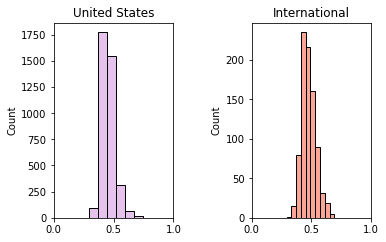

In [27]:
print('Standard Field-Goal Percentage')
shooting_eff_data(df_US, df_INT, 'FGM', 'FGA', 10)

We see both distributions are centered around 0.4-0.5 with no obvious outliers

Effective Field-Goal Percentage


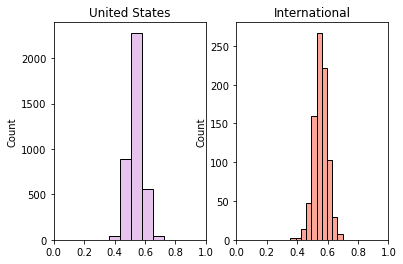

In [28]:
def effective_fg_per(US_data, INT_data, points, FGA, FTA, bins):
  
  avg_US = US_data[points] / (2*(US_data[FGA] + 0.44*US_data[FTA]))
  avg_INT = INT_data[points] / (2*(INT_data[FGA] + 0.44*INT_data[FTA]))

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')
  fig.show()

print('Effective Field-Goal Percentage')
effective_fg_per(df_US, df_INT, 'PTS', 'FGA', 'FTA', 10)

We see both distributions are centered around 0.5 with no obvious outliers

### Free Throw Percentage (FTM / FTA)

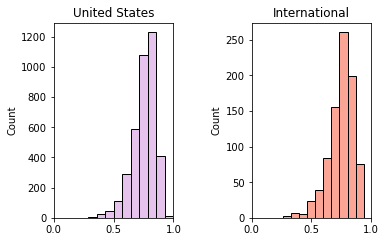

In [29]:
shooting_eff_data(df_US, df_INT, 'FTM', 'FTA', 10)

We both distributions are skewed left, but we also notice that the US has players shooting high 90% from the free throw line and international does not.

### Turnovers

Average Turnovers


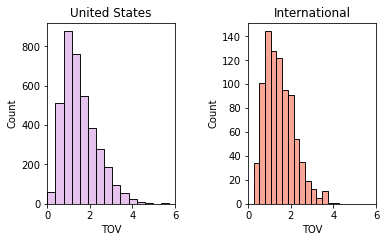

In [30]:
print('Average Turnovers')
stats_data(df_US, df_INT, 'TOV', 15, 6)

We both distributions are skewed to the right, however we see that the US distributions stretches farther right than the International. Additionally, it has an outlier at roughly 5.5.

Turnover Percentage: $$\frac{TOV}{FGA+0.44*FTA+TOV}$$

This statistic is an estimation of the number of turnovers a player will commit every 100 plays(Will go into more detail in final project).

Turnover Percentage


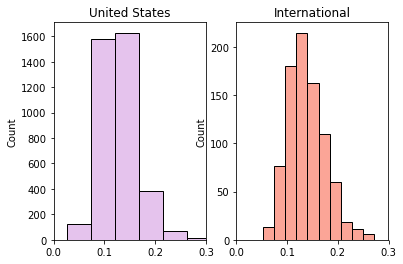

In [31]:
def turnover_per(US_data, INT_data, TO, FGA, FTA, bins):
  
  avg_US = US_data[TO] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[TO] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,.3), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,.3), title='International')
  fig.show()

print('Turnover Percentage')
turnover_per(df_US, df_INT, 'TOV', 'FGA', 'FTA', 10)

Here we notice that international players seem to have less variability and seem to have a slightly less turnover percentage on average when compared to US players.

### Personal Fouls

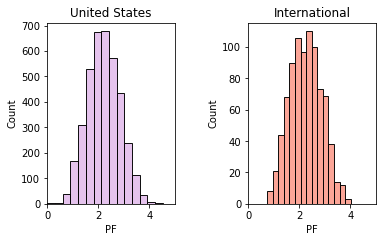

In [32]:
stats_data(df_US, df_INT, 'PF', 15, 5)

**Note: Personal fouls are not necessarily a good performance metric, but when compared with steals we can try to develop a model that shows effectiveness on defense.**

Here we see that both distributions are very similar where the US players seem to have a greater spread.

### Rebounds

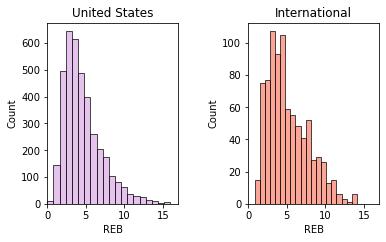

In [33]:
stats_data(df_US, df_INT, 'REB', 20, 17)

Here we see both distributions are skewed to the right, but the US seems to peak at about 2 rebounds higher than the International distribution.

### Assists

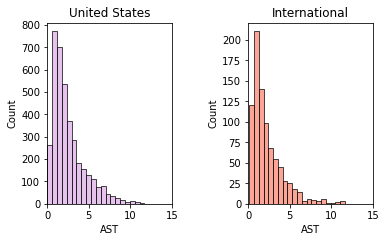

In [34]:
stats_data(df_US, df_INT, 'AST', 20, 15)

Both distributions here are skewed right and very similar.

### Steals

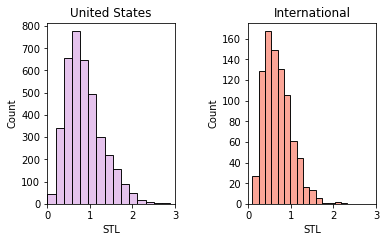

In [35]:
stats_data(df_US, df_INT, 'STL', 15, 3)

Both distributions appear to be slightly skewed right with means of roughly 0.6

### Blocks

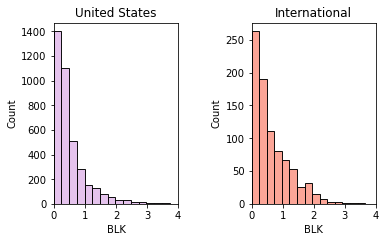

In [36]:
stats_data(df_US, df_INT, 'BLK', 15, 4)

Both distributions are skewed right and are very similar.

### Points

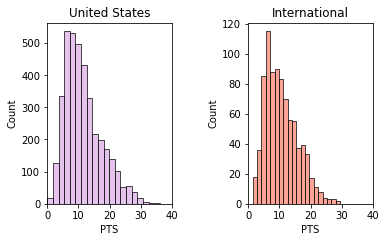

In [37]:
stats_data(df_US, df_INT, 'PTS', 20, 40)

Both distributions are skewed right, however the US does peak about 6-7 points higher than the International distribution.

### EFF Rating

**Note: This is going to be moved into it's own section**

ValueError: Could not interpret value `EFF` for parameter `x`

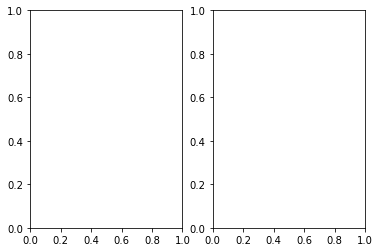

In [42]:
stats_data(df_US, df_INT, 'EFF', 20, 40)

### Points Per Possession

Points per possession measures how effectively a player can score the ball during a theoretically time window calculated through FGA, FTA, and TOV. These stats are used because they tend to be representative of how long a player has been playing. The formula:

$$\frac{Points}{FGA+0.44*FTA+TOV}$$


In [ ]:
def ppp_rating(US_data, INT_data, points, TO, FGA, FTA, bins):
  
  avg_US = US_data[points] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[points] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1.5), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1.5), title='International')
  fig.show()

print('Points Per Possession')
ppp_rating(df_US, df_INT, 'PTS', 'TOV', 'FGA', 'FTA', 10)

Both distribution look to be centered at about 1.

### Interpretations

From what we can see, US and international players' box score statistics tend to be the same besides some minor differences and skew between them. However, that still doesn't mean these groups are necessarily performing the same. For this next part we are going to compare two statistics together from each group(US and International). 

## Joint Stats EDA

**Notes: Our team is currently doing more research on joint box score stats within the NBA. However, we believe these could be a good indicator into a player's offensive or defensive efficiency while on the court.**

### Assits vs Steals

In [ ]:
print('United States')
sns.jointplot(df_US['TOV'], df_US['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

print('International')
sns.jointplot(df_INT['TOV'], df_INT['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

### Minutes vs Field-Goal Percentage

In [ ]:
USA = df_US['FGM']/df_US['FGA']
INT = df_INT['FGM']/df_INT['FGA']

print('United States')
sns.jointplot(USA, df_US['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

print('International')
sns.jointplot(INT, df_INT['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

### Interpretations

## Season-by-Season EDA

**Notes: This is the most useful category in our EDA because it shows how our two groups of players have performed over time. This also helps account for the fact that years closer to 2000 didn't have as many international players as there are now, which can be seen in some graphs.**

In [ ]:
# Combine US and International data frames together for more indepth analysis
df = pd.concat([df_US, df_INT]).reset_index()

# Rename nationalities to 'United States' and 'International'
df.loc[df['nationality'] != 'United States', 'nationality'] = 'International'

# Relabel 'Season' column so values only contain the year the season was completed
df['Season'] = df['Season'].str[7:]

In [ ]:
def compare_seasons_per(df, stat1, stat2):

  percent = df[stat1] / df[stat2]

  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=percent, hue='nationality')

def compare_seasons_stat(df, stat):
  
  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=stat, hue='nationality')

### Field-Goal Percentage Since 2000

In [ ]:
# Calculating Field-Goal Percentage for every season between US and International players
compare_seasons_per(df, 'FGM', 'FGA')

Over every season, international players have had a higher average FG% than US players.

### Free-Throw Percentage Since 2000

In [ ]:
# Calculating Free Throw Percentage for every season between US and International players
compare_seasons_per(df, 'FTM', 'FTA')

It is currently unknown by our team why free throw percentage was significantly lower for international players in the early 2000s. However, as time progresses we see that they begin to become closer together.

### Rebounds Since 2000

In [ ]:
# Calculate avg rebounds by each group over every season
compare_seasons_stat(df, 'REB')

Once again, we see that international players consistently have higher averages for rebounds compared to US players.

### Assists Since 2000

In [ ]:
# Calculate avg assists by each group over every season
compare_seasons_stat(df, 'AST')

Here we see that US players are consistently averaging more assists than international players, however it should be noted that they are still reletively close.

### Steals Since 2000

In [ ]:
# Calculate avg steals by each group over every season
compare_seasons_stat(df, 'STL')

We see that US players consistently averaged more steals than international players. However, we are unsure why international players had significantly lower averages in the early 2000s and then peaked. 

### Blocks Since 2000

In [ ]:
# Calculate avg blocks by each group over every season
compare_seasons_stat(df, 'BLK')

We see that international players averaged more blocks than US players over every season.

### Points Since 2000

In [ ]:
# Calculate avg points by each group over every season
compare_seasons_stat(df, 'PTS')

We see that their averages tend to fluctuate a lot and they switch between having the higher average.

### Interpretations

Here we are able to see trends over time of US players vs Internation players. This is helpful because over the past two decades international players have become more relevant in the NBA. Additionally, we can see that on average International players tend to do better in certain categories than US players.

## T-Test

In [ ]:
from scipy.stats import ttest_ind, chisquare, normaltest

In [ ]:
variables = list(['GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 
                  'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'FG%', 'FT%', '3PFG%'])
t = []
for i in variables:
    US = df_US[i]
    INT = df_INT[i]
    t.append(ttest_ind(US, INT))
t_values= pd.DataFrame(data=t,index=variables,columns=["Test_Statistic","p-value"])
t_values['Significance'] = t_values['p-value'] < 0.05
t_values




    

# Conclusion & Discussion

**TODO: This**

# Team Contributions

**TODO: This**

# ToDo

* T-Tests
  - In-depth analysis 
* Improved visualizations
* Add extra references from research
* Results/Conclusion